# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

# Loading the dataset
iris_dataset_url = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/iris/iris.tsv.gz"
df_iris = pd.read_csv(iris_dataset_url, sep="\t")

# Show a random sample of 10 rows
df_iris.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,target
32,6.4,3.1,5.5,1.8,2
98,6.2,2.2,4.5,1.5,1
23,6.2,2.9,4.3,1.3,1
38,6.7,3.1,4.4,1.4,1
99,5.0,2.3,3.3,1.0,1
129,5.7,3.0,4.2,1.2,1
30,6.7,3.1,5.6,2.4,2
45,6.3,3.3,6.0,2.5,2
37,5.7,2.8,4.1,1.3,1
11,4.9,3.1,1.5,0.1,0


For this final projects, I selected the Iris dataset, a well-known dataset in machine learning that contains measurements of iris flowers along with their species labels. 

After loading the dataset and displaying a random sample of 10 rows, I can observe that the dataset includes five columns: 
* 4 numerical feature columns: sepal length, sepal width, petal length, and petal width
* 1 target column indicating the three species (Iris Setosa, Iris Versicolour, Iris Virginica). The target classes appear as integers (0, 1, 2)

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
# YOUR CODE HERE

# List all columns
print(f"The columns of the dataset: {list(df_iris.columns)} \n")

# Show descriptive statistics
# ----------------------------------------------------------------------------
# 1- Consider feature columns only 
print("-------------- FEATURE COLUMNS --------------")
feature_columns = ["sepal-length", "sepal-width", "petal-length", "petal-width"]
print(df_iris[feature_columns].describe())

# 2- Consider the target column: show counts of each species
print("-------------- TARGET COLUMN --------------")
print(df_iris['target'].value_counts())

# 3- Missing values Verfication 
print("-------------- Check for missing values --------------")
print(f"The total number of missing values in the dataset : \n{df_iris.isnull().sum()}")

The columns of the dataset: ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target'] 

-------------- FEATURE COLUMNS --------------
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
-------------- TARGET COLUMN --------------
target
2    50
1    50
0    50
Name: count, dtype: int64
-------------- Check for missing values --------------
The total number of missing values in the dataset : 
sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
target          0
dtype: int64

#### Column Descriptions and Statistical Summary
The Iris dataset contains five columns representing flower measurements and species labels. Below are descriptions of each column, followed by key statistical insights based on the dataset’s summary statistics. 
<br/><br/>
**Column Descriptions:**
* **sepal-length** <br/>
The length of the sepal measured in centimeters.\
The sepal is the part of the flower that lies underneath the petals and protects them when the flower is still a bud. Measuring its length helps give an idea of the overall size of the flower.
* **sepal-width** \
The width of the sepal in centimeters.\
While *sepal-length* captures how tall the structure is, *sepal-width* measures how broad it is. Together, these two measurements describe the general shape of this part of the flower.
* **petal-length** \
The length of the petals in centimeters. \
*Petal length* tends to show larger differences across species, which is why it’s often very helpful in distinguishing between the three *iris* types.
* **petal-width**\
The width of the petals in centimeters.\
Like *petal length*, this measurement differs significantly among species.
* **target**\
Encoded species label:
    - 0 = "Iris Setosa"
    - 1 = "Iris Versicolor"
    - 2 = "Iris Virginica"

<br/><br/>
**Statistical Summary of the Numeric Features:**
* **General Observations** \
All four measurements have 150 entries, meaning no feature values are missing
* **sepal-length**
    - Mean: ~5.84 cm
    - Range: 4.3 to 7.9 cm
    - Moderate variability (std ~0.83)
* **sepal-width**
    - Mean: ~3.05 cm
    - Range: 2.0 to 4.4 cm
    - Lowest variability (std ~0.43), indicating this attribute stays relatively consistent
* **petal-length**
    - Mean: ~3.76 cm
    - Range: 1.0 to 6.9 cm
    - High variability (std ~1.76), reflecting strong species differences
* **petal-width**
    - Mean: ~1.20 cm
    - Range: 0.1 to 2.5 cm
    - Also highly variable (std ~0.76), useful for classification
* **Distribution of the Species (Target Column)**
    - 50 samples labeled as 0 (Setosa)
    - 50 samples labeled as 1 (Versicolor)
    - 50 samples labeled as 2 (Virginica) \
    =>This perfectly balanced distribution ensures that no species dominates the dataset
* **Missing Values Check**
    - There are zero missing values across all columns \
    => This means the dataset is clean and ready for further analysis without requiring imputation or cleaning


### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

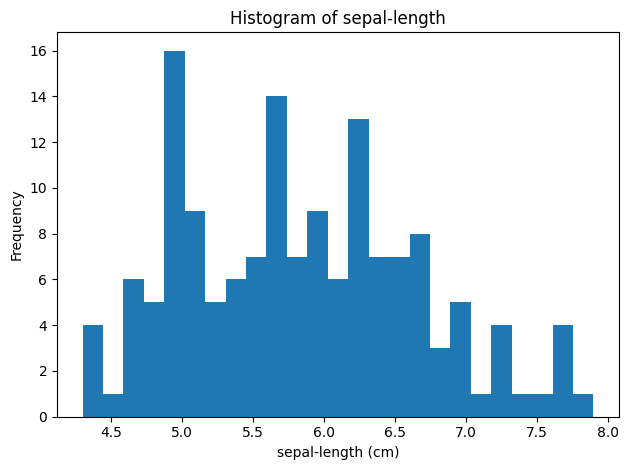

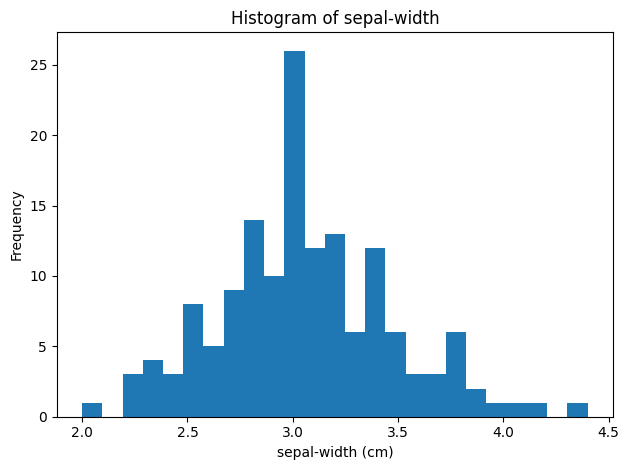

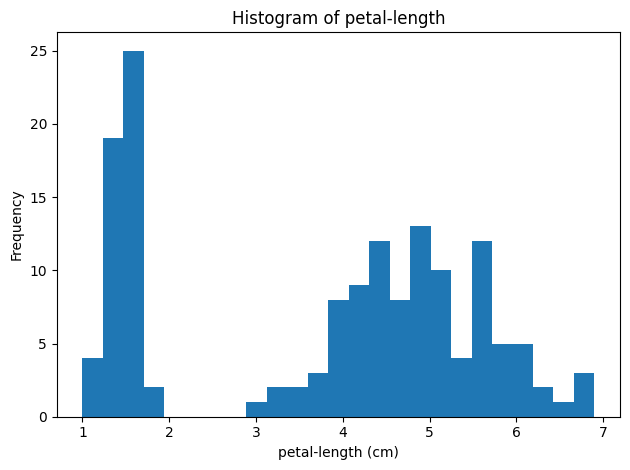

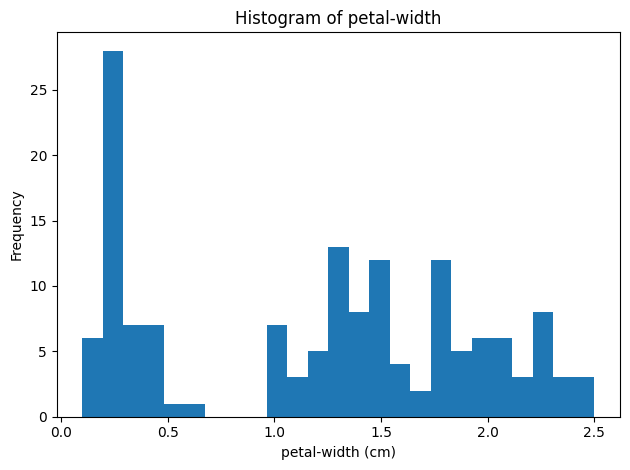

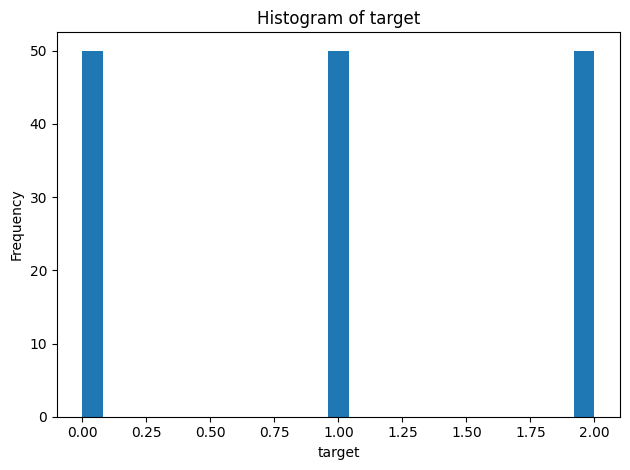

In [5]:
# YOUR CODE HERE

# Let's plot one histogram per column
for col in df_iris.columns:
    plt.figure()
    plt.hist(df_iris[col], bins=25)
    plt.title(f"Histogram of {col}")
    if col != 'target':
        plt.xlabel(col +" (cm)")
    else:
        plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()

#### Histograms and Distribution Interpretation
I plotted a histogram for each column in the *Iris* dataset. The histograms give a quick visual sense of how each feature is distributed and whether it resembles any of the distributions we covered in the course.\
Below is my interpretation of each column:
* **sepal-length** <br/>
The histogram for *sepal-length* shows a shape that is somewhat bell-shaped but not perfectly symmetric.\
It has a noticeable spread around the middle values (around 5.0 to 6.5).\
While it doesn't match a perfect normal distribution (not a perfect bell curve), the distribution is closest to a **roughly normal distribution and shows a slight skew to the right.**
* **sepal-width** <br/>
The histogram for *sepal-width* shows most values clustered around 3.0 cm, with the frequencies gradually dropping off on both the lower and higher ends.\
The shape is not perfectly smooth, and there are a few small bumps, but overall it does not lean heavily to either side.\
Instead of being strongly skewed, it looks **roughly symmetric with some minor irregularities.** \
Because of this, I would say *sepal-width* is best described as an **approximately normal continuous distribution**, just not a perfectly ideal bell curve.
* **petal-length** <br/>
The histogram for *petal-length* shows two clearly separated groups: \
One tight peak appears at small values around 1.4–1.6 cm, which corresponds to *Iris Setosa*. \
A second, broader group extends roughly from 3.0 to 6.9 cm, representing the other two species.\
There is an empty gap between about 2.0 and 3.0 cm, so the two regions hardly overlap at all. \
Because of this strong separation and the presence of two distinct clusters, the distribution of *petal-length* is best described as **bimodal**, which is a specific **example of a multimodal distribution**
* **petal-width** <br/>
The histogram for *petal-width* looks very similar to *petal-length* in terms of structure.\
There is a tight cluster of very small values around 0.2–0.5 cm, and another broader cluster between 1.0 and 2.5 cm.\
The middle region is mostly empty, reinforcing the idea that the species fall into two separate groups.\
This produces another clear **bimodal distribution**, consistent with the **multimodal patterns**.
* **target (Species Label)** <br/>
The histogram for the *target* column displays three bars at the values 0, 1, and 2, with each bar having the same height.\
This distribution is **NOT** continuous at all.\
Instead, it represents a **categorical (discrete) distribution**, where each category occurs an equal number of times.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

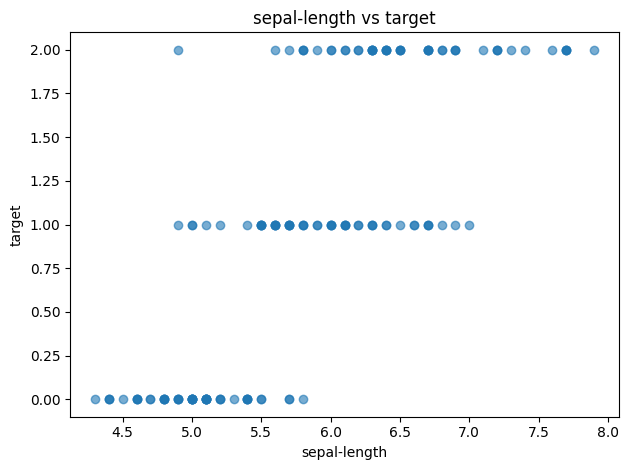

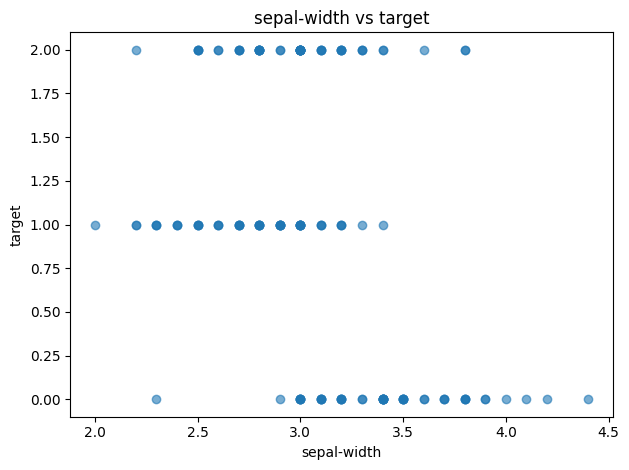

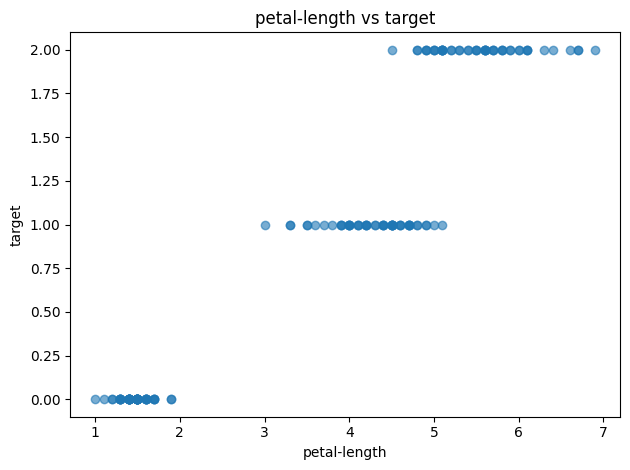

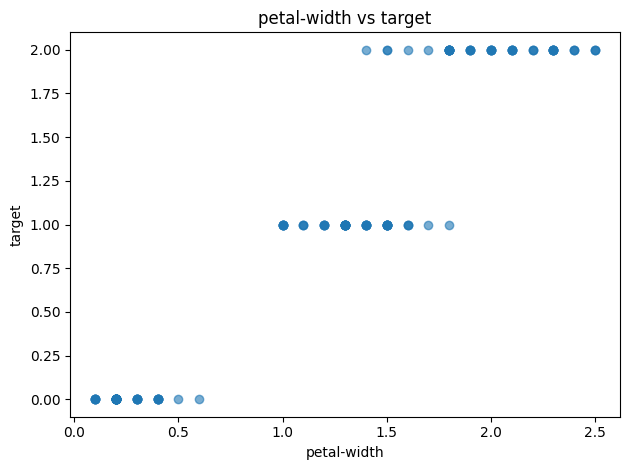

In [6]:
# YOUR CODE HERE

input_columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
target_column = 'target'

# Scatter plots of each input column vs target
for col in input_columns:
    plt.figure()
    plt.scatter(df_iris[col], df_iris[target_column], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel("target")
    plt.title(f"{col} vs target")
    plt.tight_layout()

#### Scatter Plots and Independence Analysis
I plotted each input column (feature) against the target (species label) in order to visually determine whether the two variables appear independent.\
Below is my interpretation of each relationship:
* **sepal-length VS target** <br/>
<u>Interpreted relationship:</u> NOT independent (dependent)\
<u>Reason:</u> \
From the scatter plot, each species appears to occupy a different general range of sepal lengths:
    * *Iris Setosa* (0) has mostly smaller sepal lengths
    * *Iris Virginica* (2) tends to have larger sepal-length values
    * *Iris Versicolor* (1) falls in the middle 


  => The target value clearly changes as sepal length increases, so the two variables are associated.

* **sepal-width VS target** <br/>
<u>Interpreted relationship:</u> NOT independent (dependent, **but weakly related**)\
<u>Reason:</u> \
Sepal width varies more within each species, but the plot still shows some pattern:
    * *Iris Setosa* (0) tends to have more points at the higher end of sepal-width (around 3.4 and above)
    * *Iris Versicolor* (1) is often around the middle values (roughly 2.6–3.0) with slight tendency toward low sepal-width values
    * *Iris Virginica* (2) is spread across a wide range that overlaps both of the others


  => Although the separation is not as clean as other features, there is still a visible structure: **the variables are not completely independent**.\
  => There is a slight pattern: *Setosa* (0) is more common at larger sepal widths and *Versicolor* (1) is a bit more common at lower ones, **but this pattern is not very strong**

* **petal-length VS target** <br/>
<u>Interpreted relationship:</u> Definitely NOT independent (dependent)\
<u>Reason:</u> \
The plot shows extremely clear separation between species:
    * *Iris Setosa* (0) forms a tight cluster of very small petal lengths
    * *Iris Versicolor* (1) and *Iris Virginica* (2) fall into two different higher ranges 


  => petal-length is one of the **strongest predictors** of species.\
  => The species label (target) changes dramatically based on petal-length, so they are **strongly dependent**.

* **petal-width VS target** <br/>
<u>Interpreted relationship:</u> NOT independent at all (dependent)\
<u>Reason:</u> \
The scatter plot reveals almost perfect species separation:
    * *Iris Setosa* (0) has very small petal widths
    * *Iris Versicolor* (1) and *Iris Virginica* (2) occupy larger and separate ranges


  => There is almost no overlap between species. petal-width is highly correlated with the target, making them **strongly dependent**.


**Conclusion**
* None of the input columns are independent of the target.
* All four input variables have some level of association with the species label.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

MSE = 0.046385088311226945


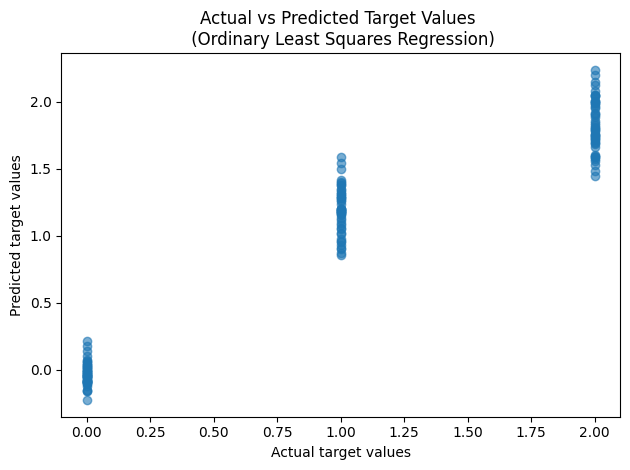

In [7]:
# YOUR CODE HERE

# Define input and target variables: X and y
X = df_iris[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
y = df_iris['target']

# Fit the ordinary least squares regression for the target using all the input columns
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

# Perform predictions
y_pred = model.predict(X)

# Compute MSE (Mean Squared Error)
mse = np.mean((y - y_pred) ** 2)
print(f"MSE = {mse}")

# Plot actual vs predicted
plt.figure()
plt.scatter(y, y_pred, alpha=0.6)
plt.xlabel("Actual target values")
plt.ylabel("Predicted target values")
plt.title("Actual vs Predicted Target Values \n (Ordinary Least Squares Regression)")
plt.tight_layout()

#### Ordinary Least Squares Regression, MSE, and Predictions' Plot
I built an ordinary least squares regression model to predict the *iris* species label (encoded as 0, 1, or 2) using all four input features: *sepal-length*, *sepal-width*, *petal-length*, and *petal-width*.\
Even though the <u>*target* is categorical</u>, the OLS model still <u>produces a numeric prediction</u>, which lets us compute a mean squared error (MSE) and visualize how well the model fits the data.\
<br/>
**Mean Squared Error (MSE)** <br/>
The mean squared error of the model over the <u>whole dataset</u> is:
* **MSE = 0.0464**

This is a fairly small error and the regression line is reasonably close to the actual species labels.\
However, because species are discrete values (0, 1, and 2), the model cannot perfectly predict the categories using a linear combination of the inputs.\
<br/>
**Actual vs Predicted Plot Interpretation** <br/>
The scatter plot shows:
* Points near 0 represent *Iris Setosa*
* Points near 1 represent *Iris Versicolor*
* Points near 2 represent *Iris Virginica*

The predictions form 3 vertical clusters near those same values, meaning the model learned a relationship between the inputs and the species.\
<br/>
**Observations** <br/>
* *The Setosa class* (0) is predicted <u>accurately</u> because <u>its petal measurements are extremely distinct</u>.
* *The Versicolor class* (1) predictions show more spread: the model sometimes predicts <u>values slightly above or below 1</u>.
* *The Virginica class* (2) is also predicted well with a <u>tight grouping of predicted values</u>.

Even though this is a <u>linear regression model</u> fitting a <u>categorical target</u>, the outputs show that the 4 input features contain <u>enough information</u> for the model to separate the 3 species fairly well.\
<br/>
**Conclusion** <br/>
* The Ordinary Least Squares regression model fits the *Iris* dataset surprisingly well (although it’s not a classification method)
* The **low MSE** and the **clustered predictions** show that the inputs strongly predict the species


### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [8]:
# YOUR CODE HERE

# Input features as a list 
X_columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
# Actual target values
y = df_iris['target']

# Dictionary holding the MSE for each single-feature Model
mse_results = {}

for col in X_columns:
    X_single_feature = df_iris[[col]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_single_feature, y)
    y_pred = model.predict(X_single_feature)
    mse = np.mean((y - y_pred) ** 2)
    mse_results[f'model trained solely on {col}'] = mse

print(f'MSE for each single-feature Model:')
for key in mse_results:
    print(key+" -> MSE: "+ str(mse_results[key]))

MSE for each single-feature Model:
model trained solely on sepal-length -> MSE: 0.2583986123119253
model trained solely on sepal-width -> MSE: 0.5493765900582834
model trained solely on petal-length -> MSE: 0.06621216537347081
model trained solely on petal-width -> MSE: 0.05678463583919234


#### Best Single Predictor and Comparison to Full Model
I tested each input column individually by fitting a separate ordinary least squares regression model using only one feature at a time.\
Then I computed the mean squared error (MSE) for each model to identify which <u>input feature</u> predicts the species label (target) <u>the best on its own</u>.\
<br/>
**Question : Which input feature gives the best model on its own?** <br/>
Based on the computed MSE values:
* Feature: *sepal-length* -> MSE = 0.2584
* Feature: *sepal-width*  -> MSE = 0.5494
* Feature: *petal-length* -> MSE = 0.0662
* Feature: *petal-width*  -> MSE = 0.0568 **(best)**

=> ***petal-width*** gives the **best single-feature linear regression model**\
=> It has the **lowest MSE**: <u>it best explains the variation in the target variable (the 3 species) when used alone</u>.

This makes sense biologically (*we've seen this in the graphs generated in Problem 4*):
* *Setosa* (0) has extremely small petal widths
* *Virginica* (2) has the largest
* *Versicolor* (1) sits in between

=> So *petal-width* <u>naturally separates the three species in a fairly linear way</u>.\
<br/>
**Question: How does this compare to the full model from Problem 5?** <br/>
* Best single-feature model **MSE = 0.0568 (trained only on petal-width)**
* Full four-feature model **MSE = 0.0464 (from Problem 5)**

**=> The full model performs better:**\
The full model has a <u>lower MSE (0.0464 < 0.0568)</u>, meaning it predicts the target more accurately than any single-feature model.

**Interpretation:**\
Each input feature contributes some information:
* Petal width and petal length are the strongest predictors
* Sepal measurements add weaker but still considered useful information

=> Hence, combining all features helps the four-feature model (Problem 5) fine-tune the decision boundaries\
=> Although petal-width alone is strong, <u>combining features reduces the prediction error even more</u>.

**Conclusion:**
* ***petal-width*** is the best single predictor of *iris* species using a linear regression model.
* The full Ordinary Least Squares Regression model with all four inputs <u>still performs better</u>, achieving the lowest MSE overall.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

Both groups contain many data points, ensuring the difference is not due to random noise
Number of data points (x < threshold) = 50
Number of data points (x >= threshold) = 100


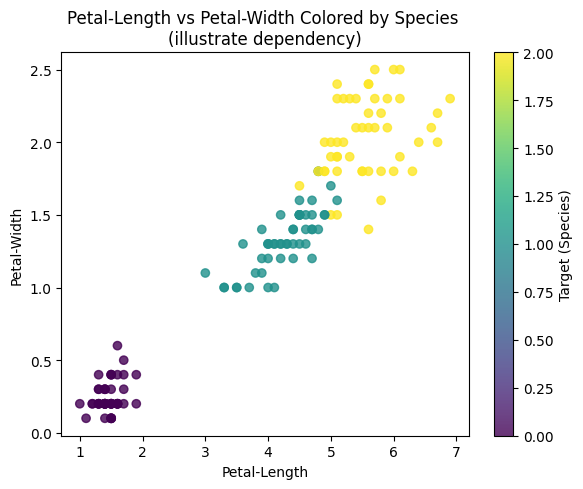

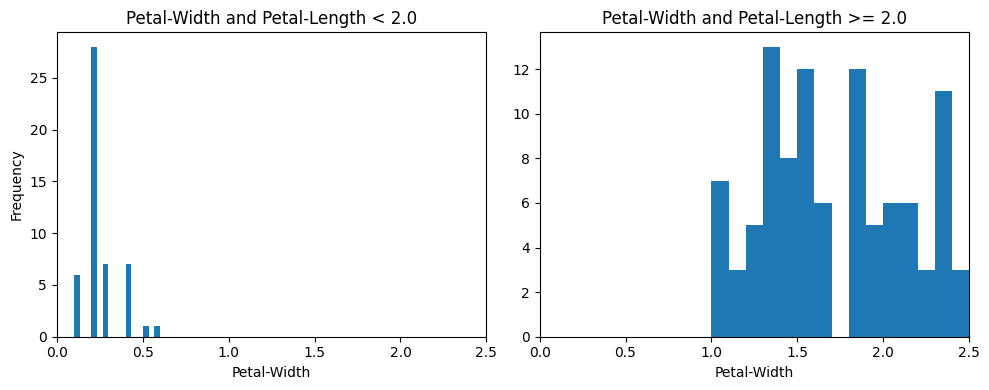

In [9]:
# YOUR CODE HERE

# Let's pick 2 columns with visible dependency
x = df_iris["petal-length"]
y = df_iris["petal-width"]

# the target column: iris species
target = df_iris["target"]

# Scatter plot to illustrate dependency with target as color
plt.figure(figsize=(6,5))
scatter = plt.scatter(x, y, c=target, cmap="viridis", alpha=0.8)
plt.xlabel("Petal-Length")
plt.ylabel("Petal-Width")
plt.title("Petal-Length vs Petal-Width Colored by Species \n(illustrate dependency)")
plt.colorbar(scatter, label="Target (Species)")
plt.tight_layout()

# Choose a threshold that creates a meaningful split
threshold = 2.0  # This value separates the species Setosa (encoded with 0) from the other species

# Create two subsets based on the chosen threshold
subset_lower_than_threshold = y[x < threshold]
subset_higherOrEqual_than_threshold = y[x >= threshold]

# Both groups contain many data points, ensuring the difference is not due to random noise.
print("Both groups contain many data points, ensuring the difference is not due to random noise")
print(f"Number of data points (x < threshold) = {len(subset_lower_than_threshold)}")
print(f"Number of data points (x >= threshold) = {len(subset_higherOrEqual_than_threshold)}")

# Plot histograms with the same x-axis range
plt.figure(figsize=(10,4))

# Histogram 1: x < threshold
plt.subplot(1,2,1)
plt.hist(subset_lower_than_threshold, bins=15)
plt.title("Petal-Width and Petal-Length < 2.0")
plt.xlabel("Petal-Width")
plt.xlim(0, 2.5)
plt.ylabel("Frequency")

# Histogram 2: x >= threshold
plt.subplot(1,2,2)
plt.hist(subset_higherOrEqual_than_threshold, bins=15)
plt.title("Petal-Width and Petal-Length >= 2.0")
plt.xlabel("Petal-Width")
plt.xlim(0, 2.5)

plt.tight_layout()

#### Exploring Dependency Between Two Input Columns
For this problem, I had to find a pair of input variables that clearly show a dependency and then illustrate that dependency through a split and comparison of histograms.\
Among all input pairs, *petal-length* and *petal-width* show the most obvious and biologically meaningful relationship:\
*(take a look at the scatter plot I generated for this problem)*
* Flowers with <u>small petal lengths</u> always have <u>small petal widths</u>  (the *Setosa* class)
* Flowers with <u>larger petal lengths</u> have <u>much larger petal widths</u>  (the Versicolor class & Virginica class)

Because of this strong dependency, I chose:
* **x = petal-length**
* **y = petal-width**

**Choosing a Threshold** <br/>
The petal-length histogram shows a <u>gap between Setosa and the other two species</u>:
* *Setosa* petal lengths are always below 2.0
* *Versicolor* and *Virginica* petal lengths are always above 3.0

So I selected: **Threshold = 2.0** and this gives two meaningful groups:
* *petal-length* < 2.0 => almost  Setosa (50 data points)
* *petal-length* >= 2.0 => almost Versicolor + Virginica (150 data points)

=> Both groups contain many data points, ensuring the difference is not due to random noise.

**Interpretation of the Histograms:**

<u>1. Histogram for petal-length < 2.0</u>
* This group has very small petal widths: all clustered between 0.1 and 0.6 cm (this corresponds to *Setosa* class)

<u>2. Histogram for petal-length >= 2.0</u>
* This group has much larger petal widths: ranging from 1.0 to 2.5 cm. (this corresponds to *to Versicolor and Virginica* classes)

**Comparison**\
The two histograms are <u>so different</u>:
* The first histogram occupies the far left of the x-axis
* The second histogram occupies the middle to far right of the x-axis

=> Because both histograms use the same horizontal scale, the dependency is visually so clear.


**Conclusion:**
* ***petal-length*** and ***petal-width*** have a strong and clear dependency
* The threshold = 2.0 effectively reveals this relationship and demonstrates that the two variables are  dependent (NOT independent at all)

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

------------- Original Dataframe (Features) - First 5 rows -------------
   sepal-length  sepal-width  petal-length  petal-width
0           6.7          3.0           5.2          2.3
1           6.0          2.2           5.0          1.5
2           6.2          2.8           4.8          1.8
3           7.7          3.8           6.7          2.2
4           7.2          3.0           5.8          1.6


------------- STD Normalized Iris Features - First 5 rows -------------
   sepal-length  sepal-width  petal-length  petal-width
0      8.091141     6.918910      2.947143     3.013782
1      7.245798     5.073867      2.833792     1.965510
2      7.487325     6.457649      2.720440     2.358612
3      9.298774     8.763953      3.797281     2.882748
4      8.694958     6.918910      3.287198     2.096544


Ordinary Least Squares Regression Model using full features from ORIGINAL Iris dataframe
MSE(full_original_iris_features_model) = 0.046385088311226945
----------------------------

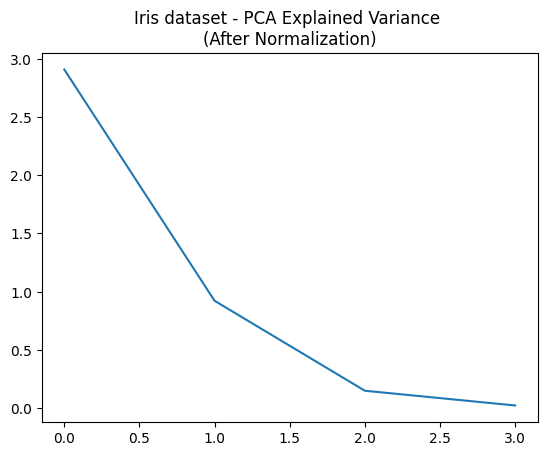

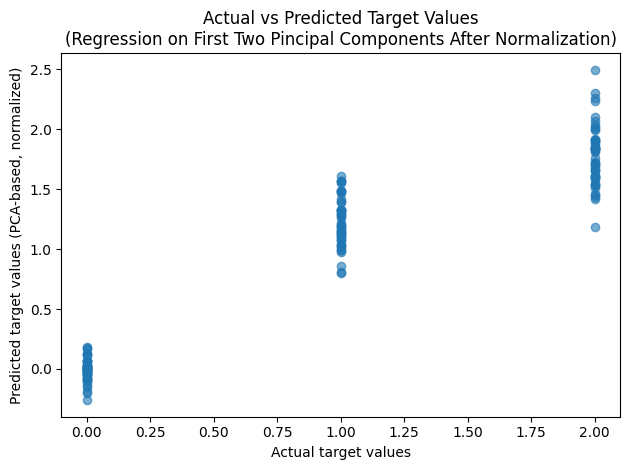

In [10]:
# YOUR CODE HERE

# Let's define our input and target variables (X and y)
X = df_iris[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
y = df_iris['target']

# For later PCA work, I choose to normalize X by dividing each column by its standard deviation (std) as it was covered in lesson 13
X_std_normalized = X / X.std()

# Display original X and normalized X
print("------------- Original Dataframe (Features) - First 5 rows -------------")
print(X.head())
print('\n')
print("------------- STD Normalized Iris Features - First 5 rows -------------")
print(X_std_normalized.head())
print('\n')

# -------- Ordinary Least Squares Regression Model using full features from ORIGINAL X --------
full_original_features_model = sklearn.linear_model.LinearRegression()
full_original_features_model.fit(X, y)
y_pred_full = full_original_features_model.predict(X)
mse_full_original_features = np.mean((y - y_pred_full) ** 2)

print("Ordinary Least Squares Regression Model using full features from ORIGINAL Iris dataframe")
print(f"MSE(full_original_iris_features_model) = {mse_full_original_features}")
print("----------------------------------------------------------------------------")

# -------- PCA on normalized data --------
pca = PCA()
X_pca = pca.fit_transform(X_std_normalized)

# -------- PCA explained variance --------
# 1- Manual Computation:
df_iris_components = pd.DataFrame(pca.components_, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
print(f"Iris Dataset Components (after normalization):\n{df_iris_components}")
print("--------------------------------------------------")
print("1- Manual Computation: PCA Explained variance")
var_vals = (X_std_normalized @ df_iris_components.T).var(axis=0)
print(f"explained variance vals:\n{var_vals}")
print(f"explained variance ratios:\n{var_vals/np.sum(var_vals)}")

print("--------------------------------------------------")
print("2- Computation using sklearn package: PCA Explained variance")
explained_variances = pca.explained_variance_
explained_variance_ratios = pca.explained_variance_ratio_
print(f"explained_variances: {explained_variances}")
print(f"explained_variance_ratios: {explained_variance_ratios}")
plt.plot(pca.explained_variance_)
plt.title("Iris dataset - PCA Explained Variance \n(After Normalization)")



# First 2 Principal Components (half of 4 input features)
X_pca_half = X_pca[:, :2]
explained_first_half = explained_variance_ratios[:2].sum()
print("--------------------------------------------------")
print("Explained variance ratio using first 2 principal components:")
print(explained_first_half)

# -------- Regression on first Principal Components --------
pca_model = sklearn.linear_model.LinearRegression()
pca_model.fit(X_pca_half, y)
y_pred_pca = pca_model.predict(X_pca_half)
mse_pca = np.mean((y - y_pred_pca) ** 2)
print("--------------------------------------------------")
print("Regression Model trained on first 2 PCs")
print(f"MSE(pca_based_model) = {mse_pca}")

# -------- Plot actual vs predicted --------
plt.figure()
plt.scatter(y, y_pred_pca, alpha=0.6)
plt.xlabel("Actual target values")
plt.ylabel("Predicted target values (PCA-based, normalized)")
plt.title("Actual vs Predicted Target Values\n(Regression on First Two Pincipal Components After Normalization)")
plt.tight_layout()


#### PCA, Dimensionality Reduction, and Regression Comparison
In this problem, I applied principal components analysis (PCA) to the four input features of the Iris dataset.\
I performed PCA after first **normalizing** each input column by dividing by its standard deviation:
* This removes differences in scale between features so that PCA **does not overemphasize** variables with large numeric ranges (like *petal-length*).


Then I built a linear regression model using only the first half of the principal components (the first two out of four).\
I then compared this PCA-based model to the original regression model from Problem 5 that used all four input features directly.

**1. PCA After Normalization** <br/>
After dividing each feature by its standard deviation, PCA extracted four principal components whose explained variance ratios were:
* **PC1**: 72.77%
* **PC2**: 23.03%
* **PC3**: 3.68%
* **PC4**: 0.52%

The first two principal components (half of the PCs) explain: **95.80%** of the total variance.

**2. Regression Using First Two Principal Components** <br/>
Next, I used only the first two principal components as inputs to a new linear regression model and predicted the target (species label).

MSE of PCA-based model (after normalization by std):  **MSE(PCA)= 0.0714**

I then plotted actual targets vs. predicted targets for this PCA-based model:\
=> The plot still shows three distinct vertical clusters (for 0, 1, and 2), but the spread within each cluster is a bit larger than with the full model, indicating slightly lower accuracy.

**3. Comparison to the Original Model (Problem 5)** <br/>

From Problem 5, using all four original features: **MSE(OLS model trained on full 4 inputs)= 0.0464**

<u>Comparing the two model</u>:
* The full feature model performs better (lower MSE).
* The PCA-based model (after normalization) has a slightly higher MSE (0.0714), meaning it loses a bit of predictive power, even though it captures 95.80% of the variance.

<u>Interpretation</u>:
* PCA keeps most of the variance in just two components, which compresses the data efficiently.
* Maximizing variance is not the same as maximizing predictive power:
    * Some of the discarded variance (in PC3 and PC4) apparently contains structure that helps the regression model fit the species labels more precisely.
    * As a result, the PCA-based regression is still good, but it is slightly worse than the model that uses all original features.


**4. Prediction Plot** <br/>
The "actual vs predicted" plot shows that:
* Predictions cluster roughly around 0, 1, and 2 (labels for species)
* The clusters are wider and more scattered than in the full-feature model => higher error


### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [ ]:
# YOUR CODE HERE

# Compute Correlations
X = df_iris[['sepal-length','sepal-width','petal-length','petal-width']]

corr = X.corr()
print("Correlation accross 4 inputs:")
print(corr)
print("\n")


# PCA Without performing normalization
pca_regular = PCA()
pca_regular.fit(X)

df_iris_components_without_normalization = pd.DataFrame(pca_regular.components_, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
print(f"Iris Dataset Components (WITHOUT normalization of original dataset):\n{df_iris_components_without_normalization}")
print("\n")

# PCA With performing normalization
X_std_normalized = X / X.std()

pca_with_normalization = PCA()
pca_with_normalization.fit(X_std_normalized)

df_iris_components_with_normalization = pd.DataFrame(pca_with_normalization.components_, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
print(f"Iris Dataset Components (WITH normalization of original dataset):\n{df_iris_components_with_normalization}")

Correlation accross 4 inputs:
              sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.109369      0.871754     0.817954
sepal-width      -0.109369     1.000000     -0.420516    -0.356544
petal-length      0.871754    -0.420516      1.000000     0.962757
petal-width       0.817954    -0.356544      0.962757     1.000000


Iris Dataset Components (WITHOUT normalization):
   sepal-length  sepal-width  petal-length  petal-width
0      0.361590    -0.082269      0.856572     0.358844
1      0.656540     0.729712     -0.175767    -0.074706
2     -0.580997     0.596418      0.072524     0.549061
3      0.317255    -0.324094     -0.479719     0.751121


Iris Dataset Components (WITH normalization):
   sepal-length  sepal-width  petal-length  petal-width
0      0.522372    -0.263355      0.581254     0.565611
1      0.372318     0.925556      0.021095     0.065416
2      0.721017    -0.242033     -0.140892    -0.633801
3     -0.261996     0.124135    

**Highest correlation:**
* corr(*petal-length* , *petal-width*) = 0.962757  [The value is extremely high => very strong linear relationship]


**How PCA Components Show PC1 Is Dominated by *petal-length* and *petal-width*:**
* Principal components analysis (PCA) finds <u>directions of maximum variance</u>.
* When two variables are <u>strongly correlated</u>, they <u>contribute heavily to the same principal component</u>.
* PCA components tell us how much each original feature contributes to each principal component:
    * Each row is a principal component, and each number is a **weight** showing how much that feature influences that component
    * The features with the largest absolute weights dominate that component

<u>Without normalization of original dataset</u>:
First Principal Component row = [0.361590,    -0.082269,      **0.856572** ,     **0.358844** ]
<br>
<u>With normalization of original dataset</u>:
First Principal Component row = [0.522372,    -0.263355,      **0.581254**,     **0.565611** ]\
<br>
<u>Interpretation</u>:
* PC1 is dominated by *petal-length* and *petal-width* because they have the **largest weights in the PC1 row** (in both PCA versions, with/without normalization).
* Petal measurements have **higher variance**, so PCA aligns PC1 with them. PC1 captures the **strong correlation** between the two petal features

**Conclusion**\
PCA detects that *petal-length* and *petal-width* move together almost perfectly, so it compresses their shared variation into the first principal component (PC1), which becomes a combined “petal size” direction.



### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

----- Iris datasets with columns in z-scores - First 5 rows ----- 
   sepal-length  sepal-width  petal-length  petal-width
0      1.034539    -0.124540      0.816888     1.443121
1      0.189196    -1.969583      0.703536     0.394849
2      0.430722    -0.585801      0.590184     0.787951
3      2.242172     1.720502      1.667025     1.312087
4      1.638355    -0.124540      1.156943     0.525883


----- Largest absolute z-value per row (iris dataset) - First 5 rows  ----- 
0    1.443121
1    1.969583
2    0.787951
3    2.242172
4    1.638355
dtype: float64


The largest absolure z-score (across all rows and columns) = 3.104284269254884
------------------------------------
Identified Outlier details: 
index:118 
row:
sepal-length    5.7
sepal-width     4.4
petal-length    1.5
petal-width     0.4
target          0.0
Name: 118, dtype: float64
------------------------------------
Corresponding z-scores across the 4 features in the row of the identified outlier: 
sepal-length   -0.17309

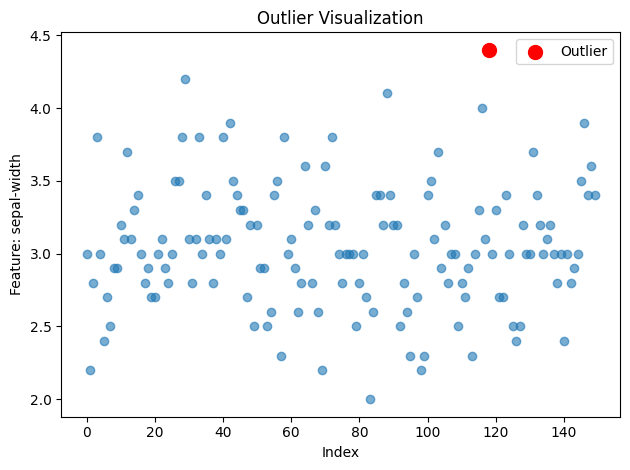

In [18]:
# YOUR CODE HERE

# all the input features in the iris dataset are numeric
# let's compute their corresponding z-scores
X = df_iris[['sepal-length','sepal-width','petal-length','petal-width']]
zscores = (X - X.mean())/X.std()
print(f"----- Iris datasets with columns in z-scores - First 5 rows ----- \n{zscores.head()}")
print("\n")

# identify the largest absolute z-value per row
df_iris_largest_abs_z_score = zscores.abs().max(axis=1)
print(f"----- Largest absolute z-value per row (iris dataset) - First 5 rows  ----- \n{df_iris_largest_abs_z_score.head()}")
print("\n")

# Identify row with the highest score: row that is extremely unusual in a particular input column
maximum_abs_zscore = df_iris_largest_abs_z_score.max()
outlier_index = df_iris_largest_abs_z_score.idxmax()
outlier_row = df_iris.loc[outlier_index]
outlier_zscores_row = zscores.loc[outlier_index]

print(f"The largest absolure z-score (across all rows and columns) = {maximum_abs_zscore}")
print("------------------------------------")
print(f"Identified Outlier details: \nindex:{outlier_index} \nrow:\n{outlier_row}")
print("------------------------------------")
print(f"Corresponding z-scores across the 4 features in the row of the identified outlier: \n{outlier_zscores_row}")

# Visualize: the outlier vs all points (using the sepal-widthvariable)
plt.figure()
plt.scatter(df_iris.index, df_iris["sepal-width"], alpha=0.6)
plt.scatter(outlier_index, df_iris.loc[outlier_index,"sepal-width"], color='red', s=100, label="Outlier")
plt.xlabel("Index")
plt.ylabel("Feature: sepal-width")
plt.title("Outlier Visualization")
plt.legend()
plt.tight_layout()

#### Identifying and Visualizing an Outlier
I used the **z-score method** to identify an **outlier** in the *Iris* dataset.
* **z-score** measures how many standard deviations a value is from the mean: **𝑧 = (𝑥 − 𝜇) / 𝜎**

Since each row has <u>4 numeric features with no missing data</u>, I computed a z-score for each feature and used:
* **Outlier score = largest absolute z-score in the row**
* => identify the row that is extremely unusual in any column of the 4 input features
	​

**Identified Outlier** <br/>
Using the method I described above, the row with the highest deviation is:
* row index = 118 
* row values = {"sepal-length": 5.7, **"sepal-width": 4.4**, "petal-length": 1.5, "petal-width": 0.4, "target": 0}
* row corresponding absolute z-score values: {"sepal-length": abs(-0.173094), **"sepal-width": abs(3.104284)**, "petal-length": abs(-1.280118), "petal-width": abs(-1.046525)}

This row was chosen because:
* The absolute z-score for *sepal-width* is larger than any other feature in the dataset.
* *sepal-width* = 4.4 (*unusually large*), while the typical range of *sepal-width* is mostly [2.5 , 3.5] (Histograms in Problem 3)


**Visualization Interpretation** <br/>
The visualization clearly shows how far this row deviates from the rest of the dataset:
* The plot shows *sepal-width* for every row in the data: the red point sits much higher than all other *sepal-width* values.


### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

NONE